Plots to reinforce discussion from correlation and linear regression results
============================================================

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

import statistics as st

In [2]:
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.size"] = 11

plt.rcParams["font.family"] = "Arial"

color = matplotlib.cm.viridis(0.3)
color_c = matplotlib.cm.viridis(0.4)

In [3]:
import imp

plot = imp.load_source('plot', '../src/plot.py')

/var/folders/19/1t7slkb13h578dr5bl_47kf80000gp/T/ipykernel_42059/1970887634.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [4]:
colors_rates = [matplotlib.cm.viridis(0.4),
                matplotlib.cm.viridis(0.45),
                matplotlib.cm.viridis(0.5),
                matplotlib.cm.viridis(0.55)]

color_c = matplotlib.cm.viridis(0.2)

color_cmean = matplotlib.cm.viridis(0.3)

color_sse = matplotlib.cm.viridis(0.35)

In [5]:
colors = [color_c, color_cmean, color_sse]

**Data Sets**

In [6]:
files = ['../data/standard_processed.csv', '../data/subset_noise_processed.csv',
         '../data/subset_probend_processed.csv', '../data/probend_noise_processed.csv']

In [7]:
dfs = [pd.read_csv(file, index_col=0) for file in files]

In [8]:
winners = [df[df['Normalized_Rank'] == 0] for df in dfs]

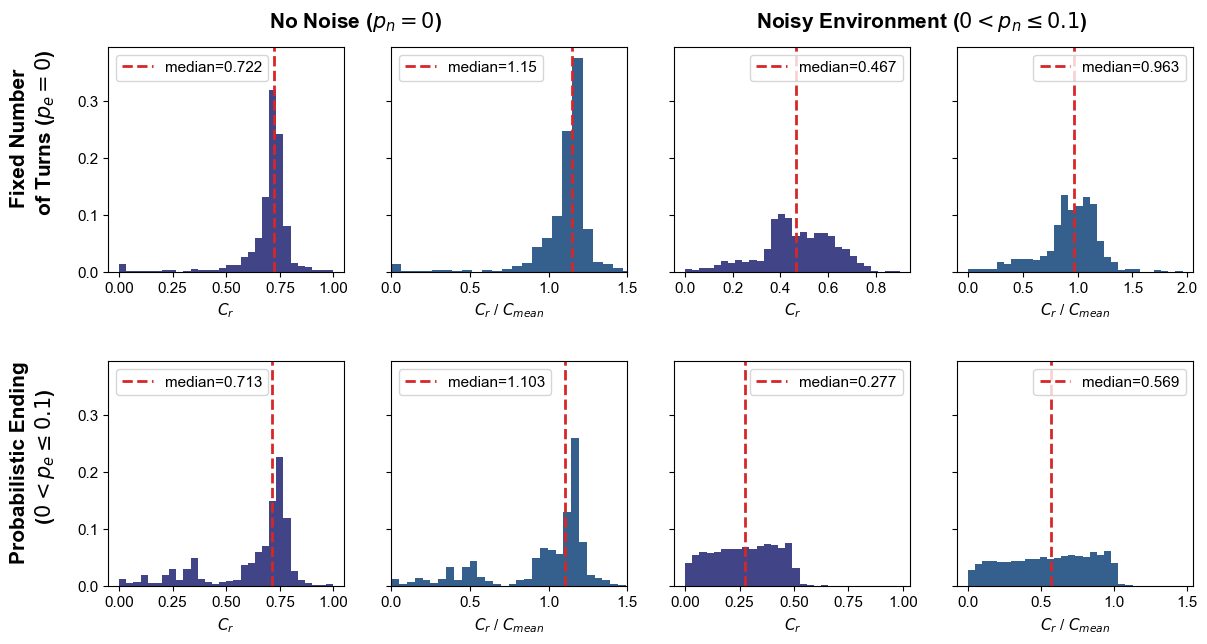

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4,
                         sharey=True, figsize=(14, 7))

# figsize=(18.5, 4.5)

count = 0

for j, df in enumerate(winners):
    for i, rate in enumerate(['Cooperation_rating',
                              'Cooperation_rating_comp_to_mean']):
        
        
        
        values = df[rate]
        weights = np.ones_like(values) / float(len(values))
        axes[int(j / 2), count % 4].hist(values, weights=weights, color=colors[i], bins=30)
        
        axes[int(j / 2), count % 4].axvline(
            np.median(values),
            color="tab:red",
            linestyle="dashed",
            linewidth=2,
            label="median=%s" % round(np.median(values), 3),
        )
        axes[int(j / 2), count % 4].legend();

        count +=1 
    
for i in [1, 3]:
    axes[0, i].set_xlabel(plot.features_labels['Cooperation_rating_comp_to_mean'])
    axes[1, i].set_xlabel(plot.features_labels['Cooperation_rating_comp_to_mean'])
    axes[0, 1].set_xlim(0, 2)
    axes[1, 1].set_xlim(0, 2)
    
for i in [0, 2]:
    axes[0, i].set_xlabel(plot.features_labels['Cooperation_rating'])
    axes[1, i].set_xlabel(plot.features_labels['Cooperation_rating'])
    axes[0, 1].set_xlim(0, 1.5)
    axes[1, 1].set_xlim(0, 1.5)
    
plt.subplots_adjust(hspace=0.4)

axes[0, 0].text(-.4, 0.1, "Fixed Number \n of Turns ($p_e = 0$)", ha='center', fontsize=15, rotation=90, fontweight='bold',)

axes[1, 0].text(-.4, 0.05, "Probabilistic Ending \n ($0 < p_e \leq 0.1$)", ha='center',  fontsize=15, rotation=90, fontweight='bold',)

axes[0, 0].set_title("No Noise ($p_n = 0$)", fontsize=15, fontweight='bold', y=1.05, x=1.05)

axes[0, 2].set_title("Noisy Environment ($0 < p_n \leq 0.1$)", fontsize=15, fontweight='bold', y=1.05, x=1.05);
 
fig.savefig('../images/features_result.pdf', bbox_inches='tight')

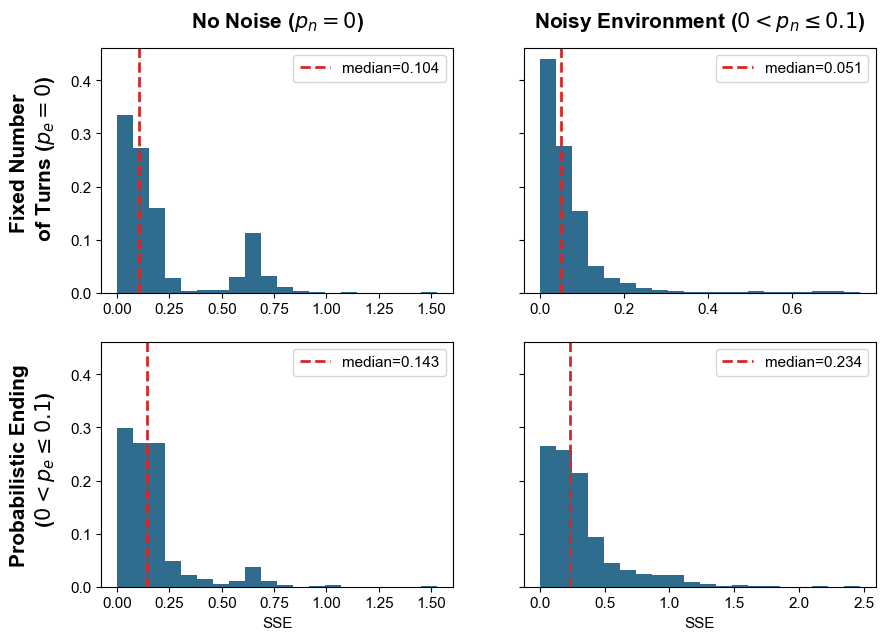

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharey=True, figsize=(10, 7))

count = 0

for j, df in enumerate(winners):
    for i, rate in enumerate(['SSE']):
        
        values = df[rate]
        weights = np.ones_like(values) / float(len(values))
        axes[int(j / 2), count % 2].hist(values, weights=weights, color=color_sse, bins=20)
        
        axes[int(j / 2), count % 2].axvline(
            np.median(values),
            color="tab:red",
            linestyle="dashed",
            linewidth=2,
            label="median=%s" % round(np.median(values), 3),
        )
        axes[int(j / 2), count % 2].legend();

        count +=1 

axes[1, 0].set_xlabel(plot.features_labels['SSE'])
axes[1, 1].set_xlabel(plot.features_labels['SSE'])

axes[0, 0].text(-.4, 0.1, "Fixed Number \n of Turns ($p_e = 0$)", ha='center', fontsize=15, rotation=90, fontweight='bold',)

axes[1, 0].text(-.4, 0.05, "Probabilistic Ending \n ($0 < p_e \leq 0.1$)", ha='center',  fontsize=15, rotation=90, fontweight='bold',)

axes[0, 0].set_title("No Noise ($p_n = 0$)", fontsize=15, fontweight='bold', y=1.05)

axes[0, 1].set_title("Noisy Environment ($0 < p_n \leq 0.1$)", fontsize=15, fontweight='bold', y=1.05);
 
fig.savefig('../images/sse.pdf', bbox_inches='tight')

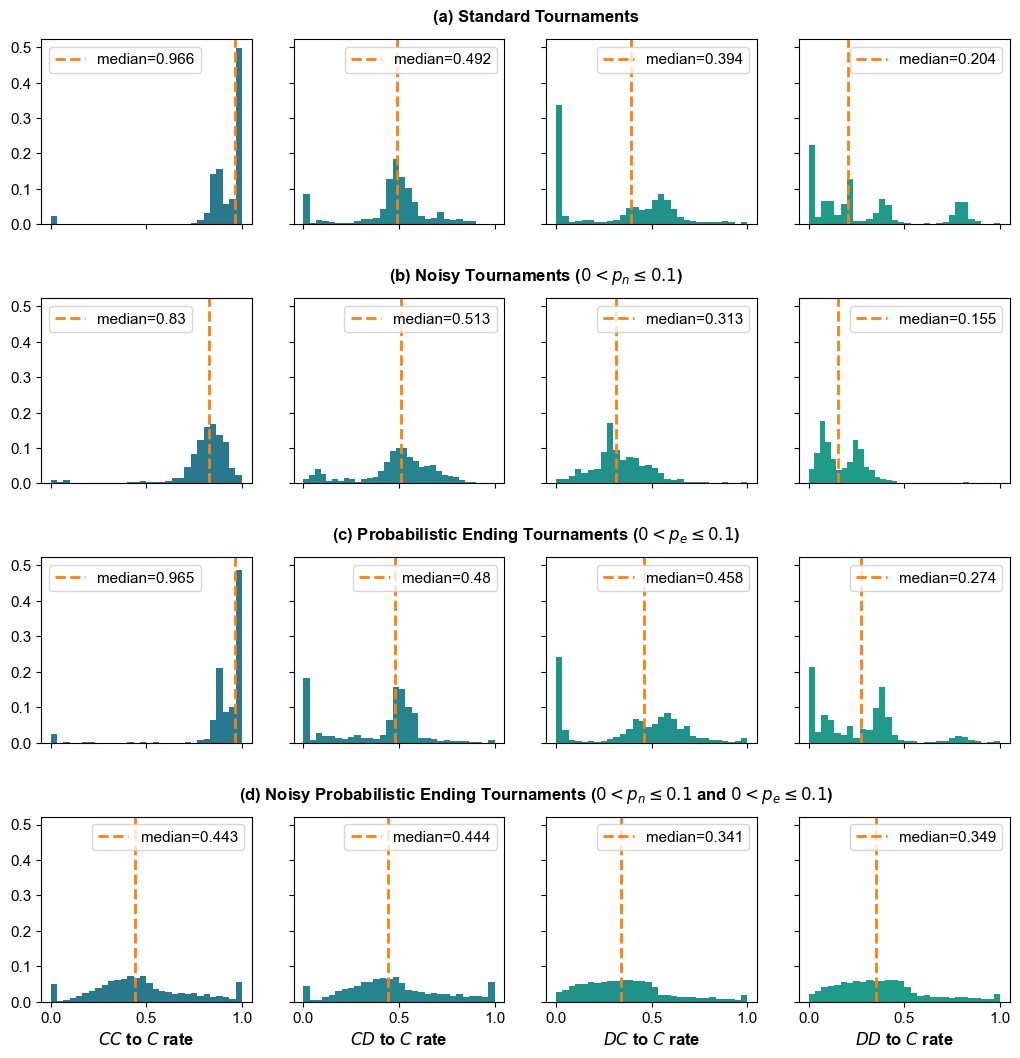

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=4,
                         sharey=True, sharex=True, figsize=(12.5, 12.5))

# figsize=(18.5, 4.5)

for j, df in enumerate(winners):
    for i, rate in enumerate(['CC_to_C_rate', 'CD_to_C_rate',
                              'DC_to_C_rate', 'DD_to_C_rate']):
        
        values = df[rate]
        weights = np.ones_like(values) / float(len(values))
        axes[j, i].hist(values, weights=weights, color=colors_rates[i], bins=30)
        
        axes[j, i].axvline(
            np.median(values),
            color="tab:orange",
            linestyle="dashed",
            linewidth=2,
            label=f"median={round(np.median(values), 3)}",
        )
        axes[j, i].legend();
        
        
axes[0, 1].set_title("(a) Standard Tournaments", x=1.15, y=1.05, fontsize=12, fontweight='bold')
axes[1, 1].set_title("(b) Noisy Tournaments ($0 < p_n \leq 0.1$)", x=1.15, y=1.05, fontsize=12, fontweight='bold')
axes[2, 1].set_title("(c) Probabilistic Ending Tournaments ($0 < p_e \leq 0.1$)", x=1.15, y=1.05, fontsize=12, fontweight='bold')
axes[3, 1].set_title("(d) Noisy Probabilistic Ending Tournaments ($0 < p_n \leq 0.1$ and $0 < p_e \leq 0.1$)", x=1.15, y=1.05, fontsize=12, fontweight='bold')

axes[3, 0].set_xlabel(plot.features_labels['CC_to_C_rate'], fontsize=12, fontweight='bold')
axes[3, 1].set_xlabel(plot.features_labels['CD_to_C_rate'], fontsize=12, fontweight='bold')
axes[3, 2].set_xlabel(plot.features_labels['DC_to_C_rate'], fontsize=12, fontweight='bold')
axes[3, 3].set_xlabel(plot.features_labels['DD_to_C_rate'], fontsize=12, fontweight='bold')

plt.subplots_adjust(hspace=0.4)
        
fig.savefig('../images/rates_result.pdf', bbox_inches='tight')

**noisy tournaments**

In [18]:
noisy = pd.read_csv('../data/noise_3_processed.csv', index_col=0)

In [19]:
winners_noisy = noisy[noisy['Normalized_Rank'] == 0]

In [20]:
titles = ['Noisy tournament', 'Probabilistic ending tournament']

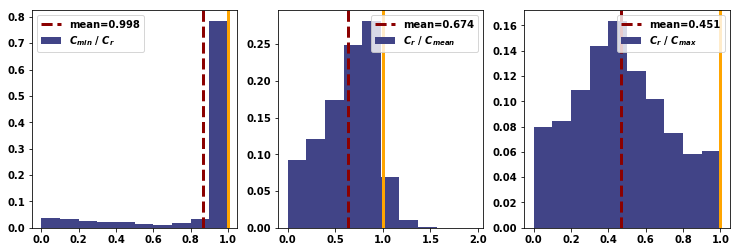

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12.5, 4))

for i, rate in enumerate(['Cooperation_rating_comp_to_min', 'Cooperation_rating_comp_to_mean',
                          'Cooperation_rating_comp_to_max']):

    values = winners_noisy[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color, label=plot.features_labels[rate])
    axes[i].axvline(
        1,
        color="orange",
        linewidth=3,
    )
    axes[i].axvline(
        np.mean(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="mean=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
for ax in axes:
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='x', colors=color)
    ax.tick_params(axis='y', colors=color)
    
    
    
fig.savefig('/Users/glynatsi/src/talks/talks/2022-03-01-Toulouse/std_states.png',
            bbox_inches='tight', transparent=True)

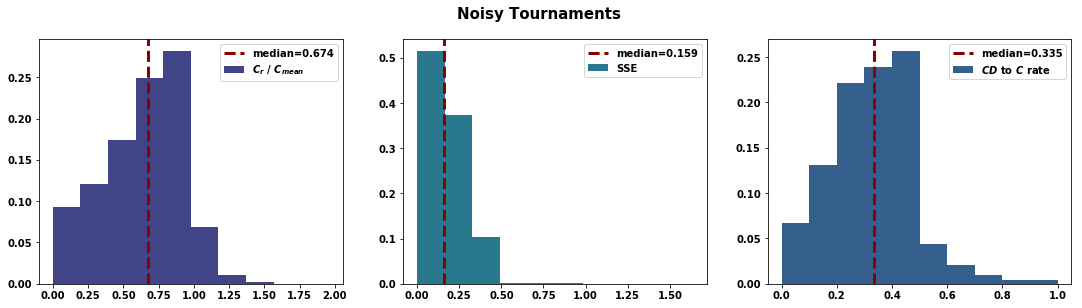

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = winners_noisy[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();

fig.suptitle('Noisy Tournaments', fontsize=15, fontweight='bold') 
fig.savefig('../images/noisy_discussion.pdf', bbox_inches='tight')

In [15]:
limits = np.linspace(0, 1, 11)

In [16]:
distributions = []
for i in range(10):
    temp = winners_noisy[(winners_noisy['noise'] > limits[i]) & (winners_noisy['noise'] <= limits[i + 1])]
    
    distributions.append(temp['Cooperation_rating_comp_to_mean'].values)

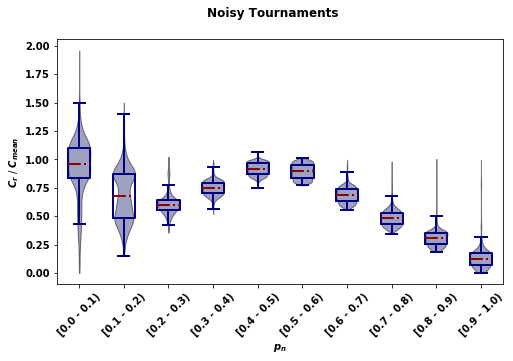

In [17]:
fig, axes  = plt.subplots(figsize=(8, 4.5))

parts = axes.violinplot(distributions, showextrema=False,
                        showmeans=False);

boxes = axes.boxplot(distributions, showfliers=False)

for pc in parts['bodies']:
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(.50)

for bp in boxes['medians']:
    bp.set_color("darkred")
    bp.set_linewidth(2)
    bp.set_linestyle('-.')
for bp in boxes['caps']:
    bp.set_color('navy')
    bp.set_linewidth(2)
for bp in boxes['whiskers']:
    bp.set_color('navy')
    bp.set_linewidth(2)
for bp in boxes['boxes']:
    bp.set_color('navy')
    bp.set_linewidth(2)
    

axes.set_xlabel(r'$p_n$')

axes.set_ylabel(plot.features_labels['Cooperation_rating_comp_to_mean'])
axes.set_xticklabels([f'[{round(limits[i], 3)} - {round(limits[i + 1], 3)})'  for i in range(10)],
                     rotation=45);

fig.suptitle('Noisy Tournaments', fontsize=12, fontweight='bold')
fig.savefig('../images/noisy_discussion_over_noise.pdf', bbox_inches='tight')

In [18]:
[np.median(dist) for dist in distributions]

[0.9630984558439484,
 0.6759047037830976,
 0.6021597369885723,
 0.7509624124428679,
 0.9176239887899864,
 0.8947669055601511,
 0.6846231211886362,
 0.48242568803125907,
 0.3051541090304953,
 0.125351306718897]

**probend**

In [24]:
probend = pd.read_csv('../data/probend_3_processed.csv', index_col=0)

/Users/glynatsi/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [25]:
winners_probend = probend[probend['Normalized_Rank'] == 0]

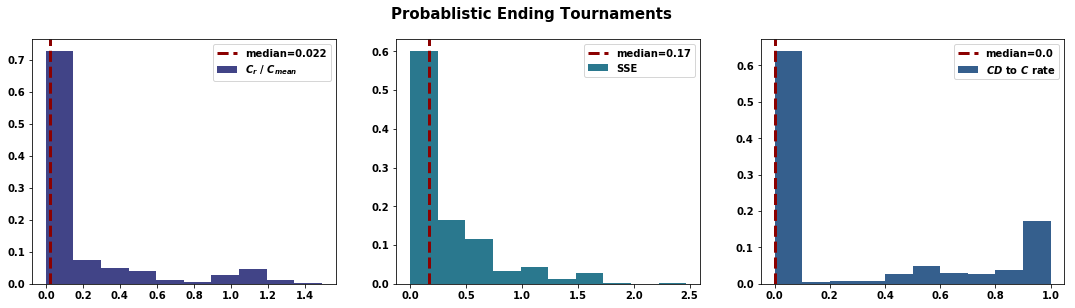

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = winners_probend[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();

fig.suptitle('Probablistic Ending Tournaments', fontsize=15, fontweight='bold') 
fig.savefig('../images/probend_discussion.pdf', bbox_inches='tight')

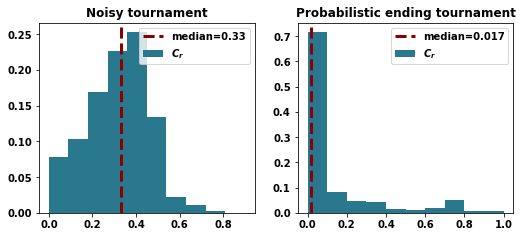

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.5))

for i, df in enumerate([winners_noisy, winners_probend]):

    values = df['Cooperation_rating']
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color_c, label=plot.features_labels['Cooperation_rating'])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    axes[i].set_title(titles[i], fontweight="bold")
    
fig.savefig('../images/c_r_winners_tournaments.pdf', bbox_inches='tight')

**noisy probabilistic ending**

In [23]:
probend_noisy = pd.read_csv('../data/probend_noise_3_processed.csv', index_col=0)

//anaconda3/envs/axlml/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [24]:
winners_probend_noisy = probend_noisy[probend_noisy['Normalized_Rank'] == 0]

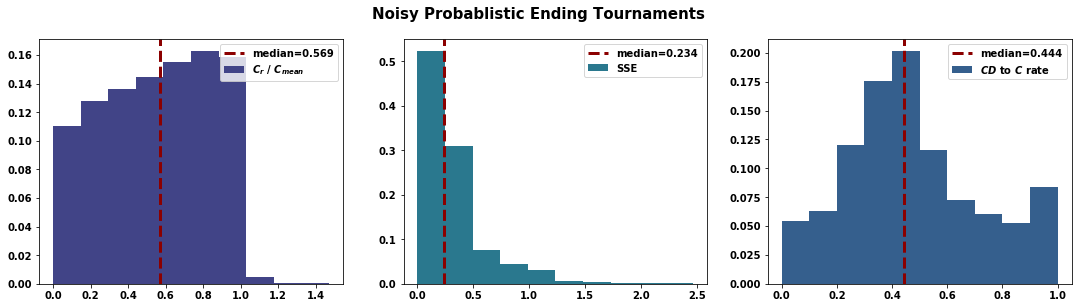

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = winners_probend_noisy[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.suptitle('Noisy Probablistic Ending Tournaments', fontsize=15, fontweight='bold') 
fig.savefig('../images/probend_noisy_discussion.pdf', bbox_inches='tight')

In [26]:
distributions = []
for i in range(10):
    temp = winners_probend_noisy[(winners_probend_noisy['noise'] > limits[i]) & (winners_probend_noisy['noise'] <= limits[i + 1])]
    
    distributions.append(temp['Cooperation_rating_comp_to_mean'].values)

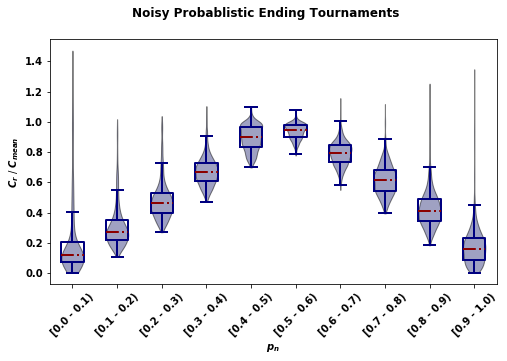

In [27]:
fig, axes  = plt.subplots(figsize=(8, 4.5))

parts = axes.violinplot(distributions, showextrema=False,
                        showmeans=False);

boxes = axes.boxplot(distributions, showfliers=False)

for pc in parts['bodies']:
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(.50)

for bp in boxes['medians']:
    bp.set_color("darkred")
    bp.set_linewidth(2)
    bp.set_linestyle('-.')
for bp in boxes['caps']:
    bp.set_color('navy')
    bp.set_linewidth(2)
for bp in boxes['whiskers']:
    bp.set_color('navy')
    bp.set_linewidth(2)
for bp in boxes['boxes']:
    bp.set_color('navy')
    bp.set_linewidth(2)
    

axes.set_xlabel(r'$p_n$')

axes.set_ylabel(plot.features_labels['Cooperation_rating_comp_to_mean'])
axes.set_xticklabels([f'[{round(limits[i], 3)} - {round(limits[i + 1], 3)})'  for i in range(10)],
                     rotation=45);

fig.suptitle('Noisy Probablistic Ending Tournaments', fontsize=12, fontweight='bold')

fig.savefig('../images/noisy_probend_discussion_over_noise.pdf', bbox_inches='tight')

In [28]:
overall_winners = pd.concat([winners, winners_noisy, winners_probend, winners_probend_noisy])

//anaconda3/envs/axlml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


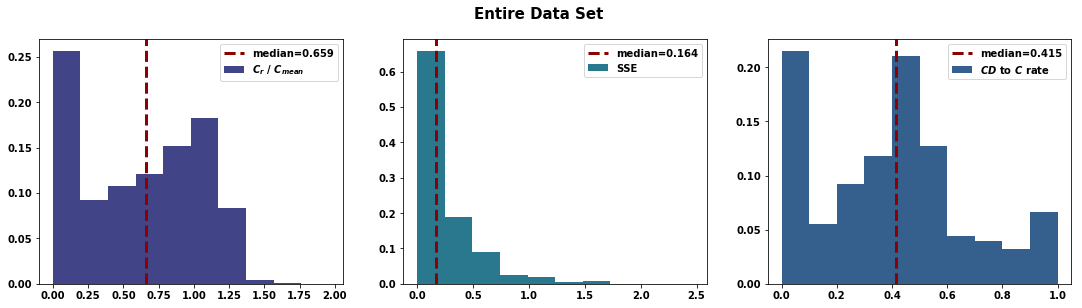

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = overall_winners[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();

fig.suptitle('Entire Data Set', fontsize=15, fontweight='bold')
fig.savefig('../images/entire_data_discussion.pdf', bbox_inches='tight')